# DS 675 Project 4


In [324]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score


# Preprocessing


In [308]:
data = pd.read_csv('StudentPerformanceFactors.csv')
df = pd.read_csv('StudentPerformanceFactors.csv')
data

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [309]:
print(f"Dataset Shape: {data.shape}")

Dataset Shape: (6607, 20)


In [310]:
#Checking if any duplicates are there or not
print("Number of duplicates values", data.duplicated().sum())

Number of duplicates values 0


In [311]:
#Checking for missing values
print("Checking for missing values")
data.isnull().sum()

Checking for missing values


,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [312]:
data = data.dropna(subset=['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home'])
print(data.shape)

(6378, 20)


In [313]:
#One-Hot Encoding:
data = pd.get_dummies(data, drop_first=True)
print(data.shape)

(6378, 28)


In [314]:
#Feature Scaling
scaler = StandardScaler()
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

In [315]:
#Splitting data intro Training and Test data:

X = data.drop('Exam_Score', axis=1)  # Drop the target to isolate predictors
y = data['Exam_Score']  # Isolate the target variable

#We will split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training data: {X_train.shape}, Training target: {y_train.shape}")
print(f"Testing data: {X_test.shape}, Testing target: {y_test.shape}")

Training data: (5102, 27), Training target: (5102,)
Testing data: (1276, 27), Testing target: (1276,)


# Exploratory Data Analysis

**Distribution Plots of Each Feature**

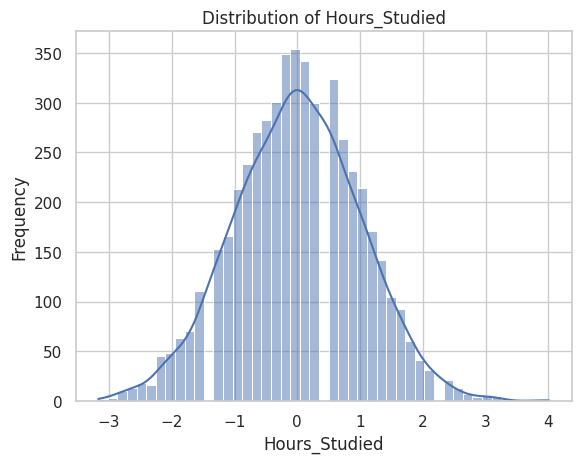

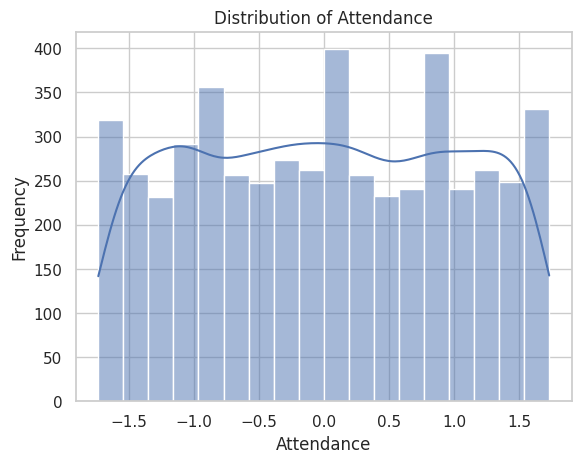

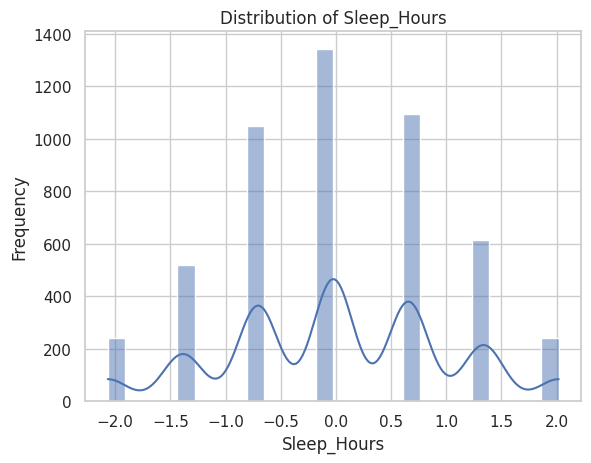

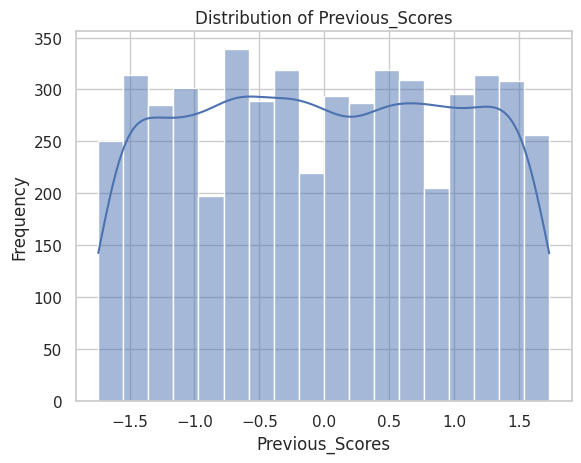

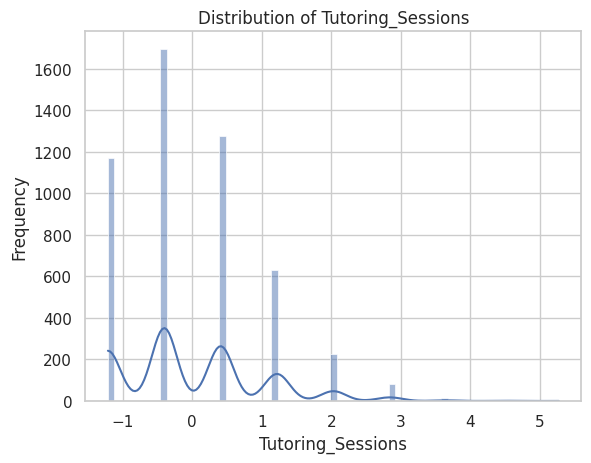

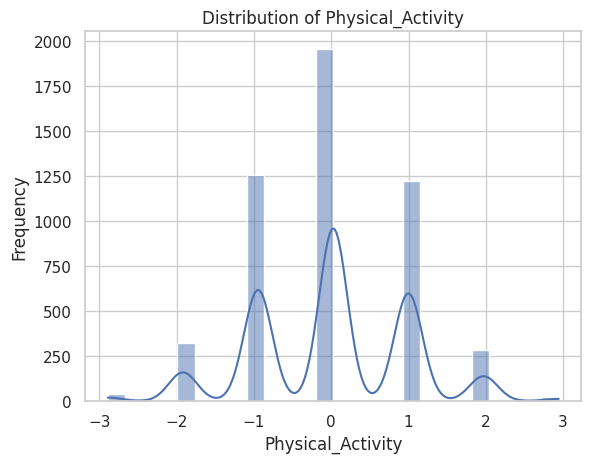

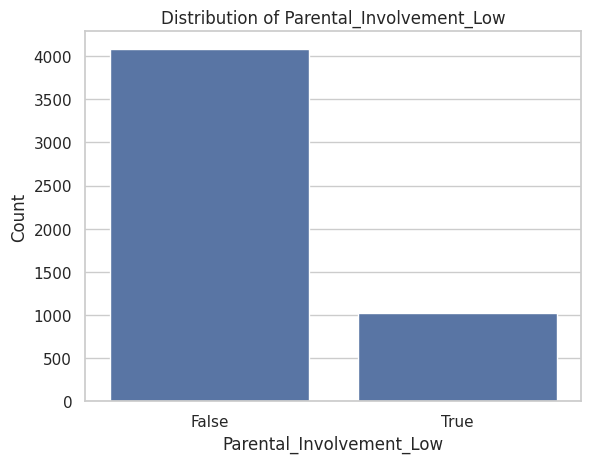

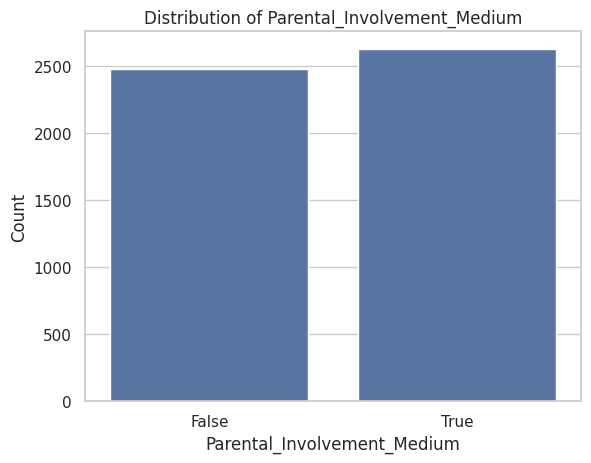

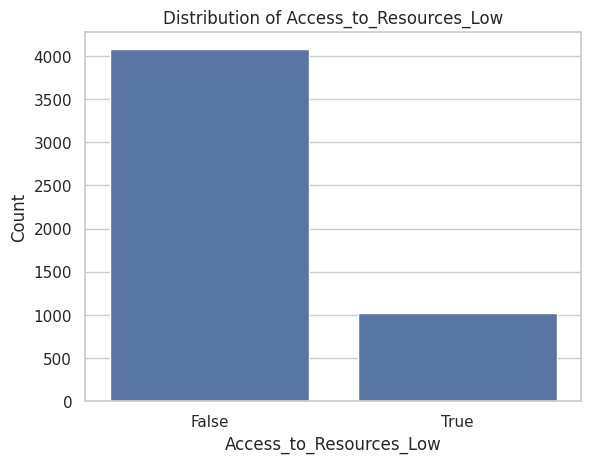

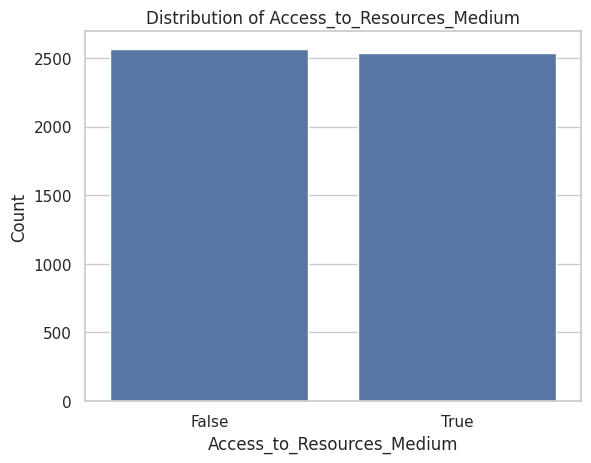

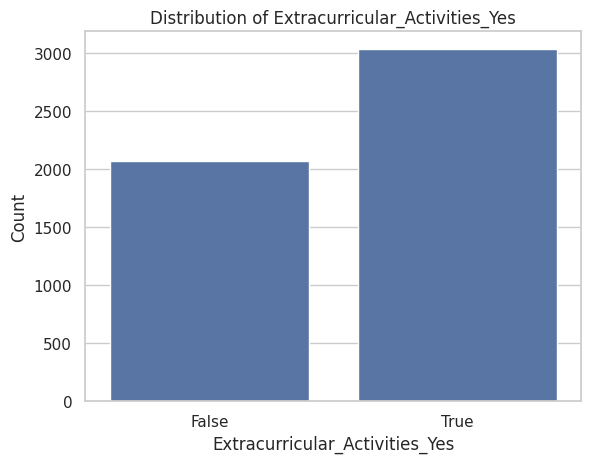

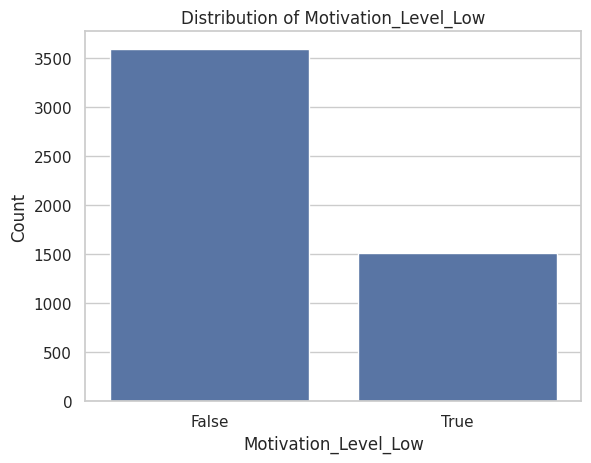

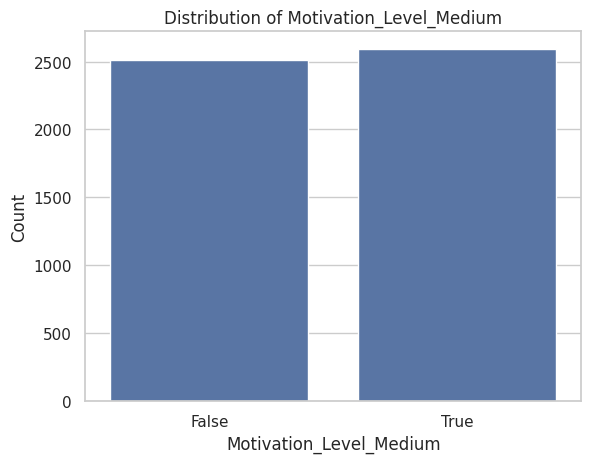

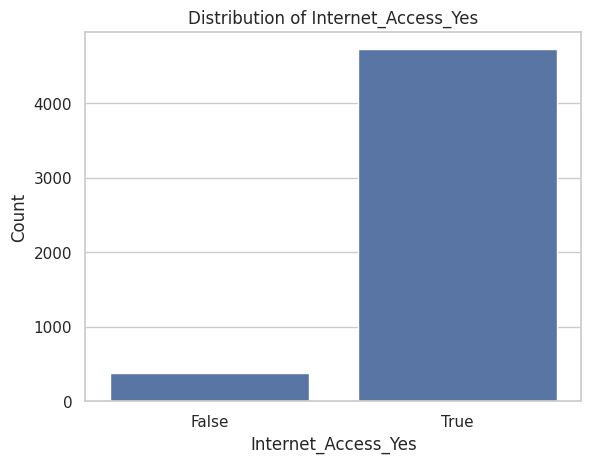

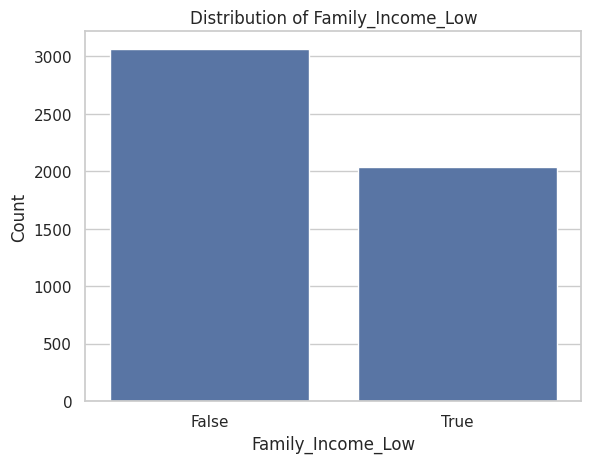

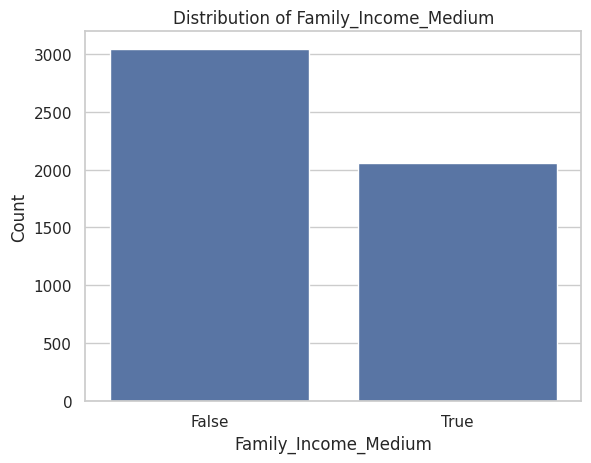

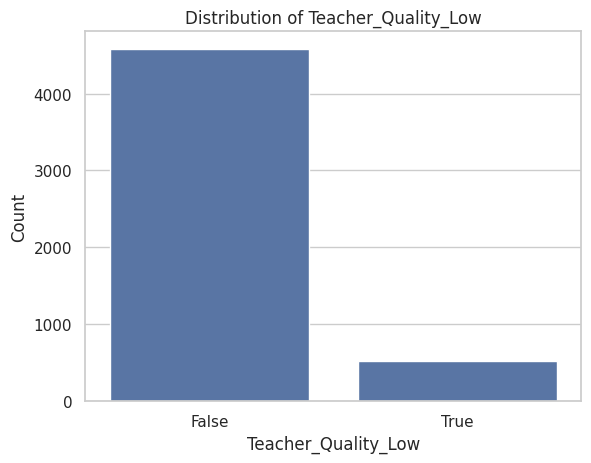

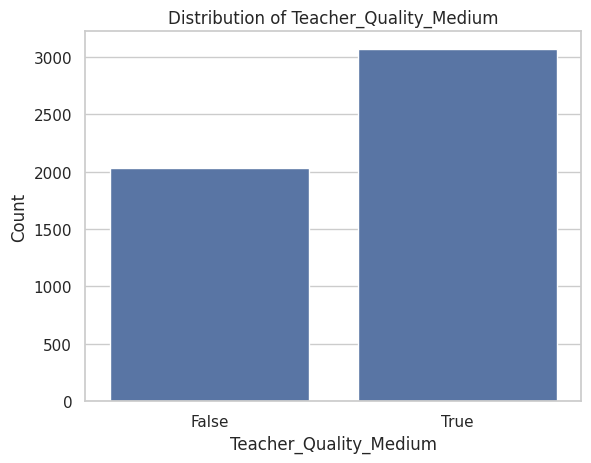

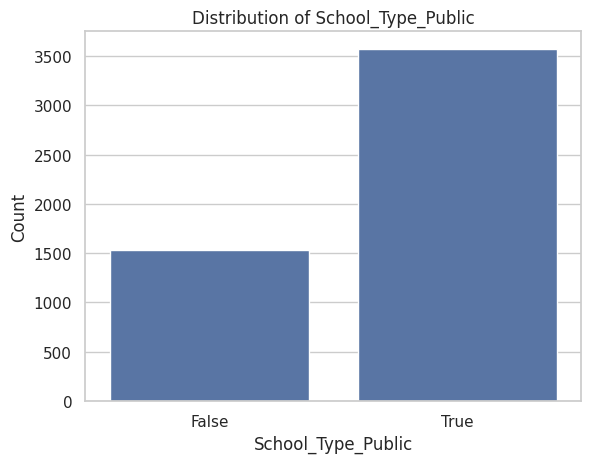

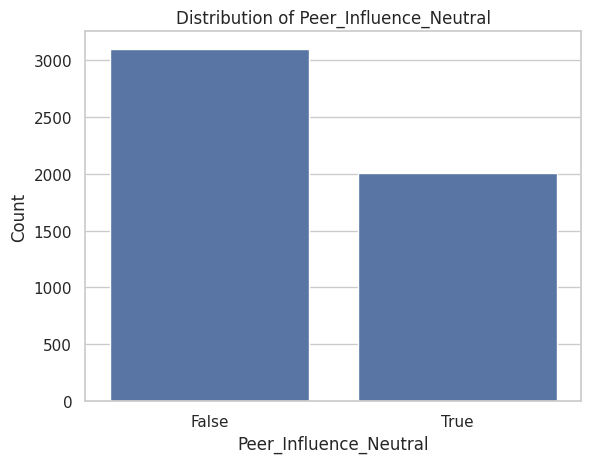

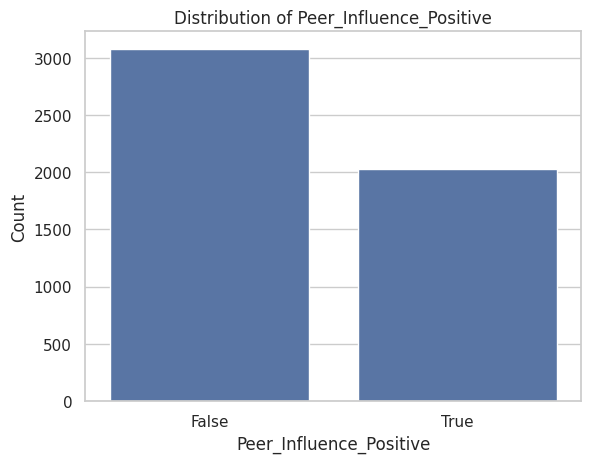

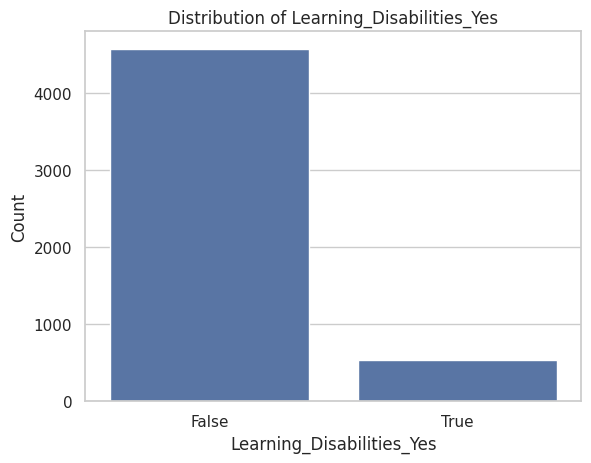

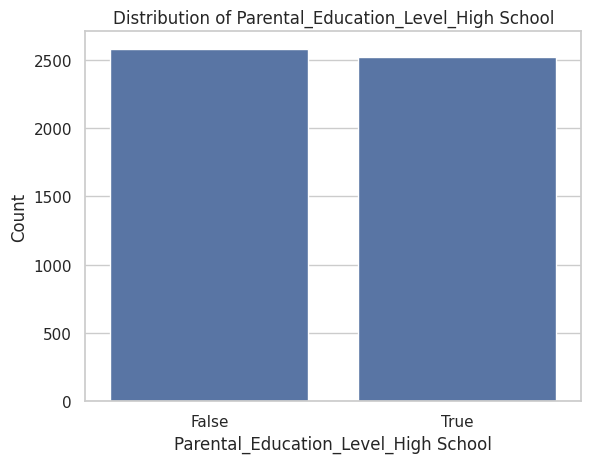

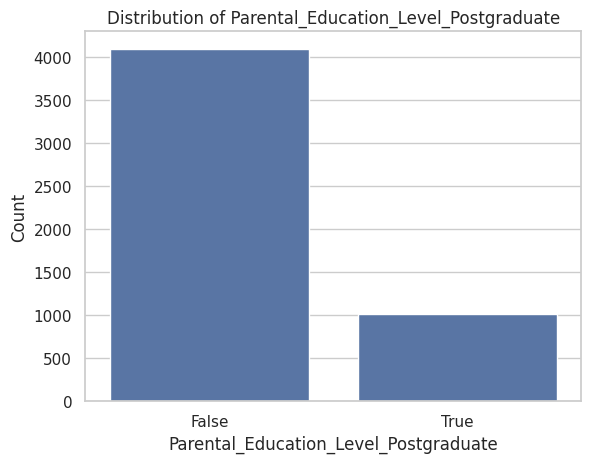

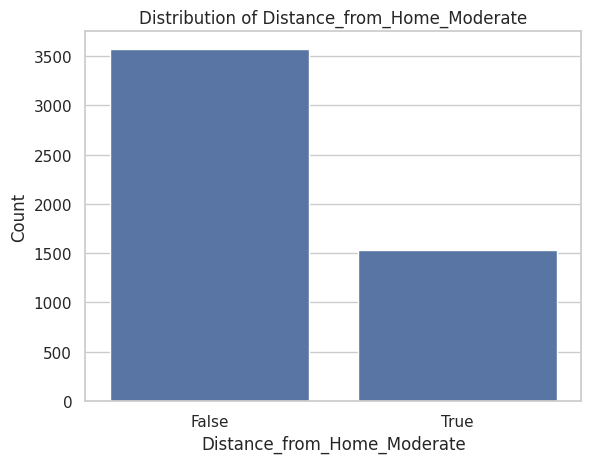

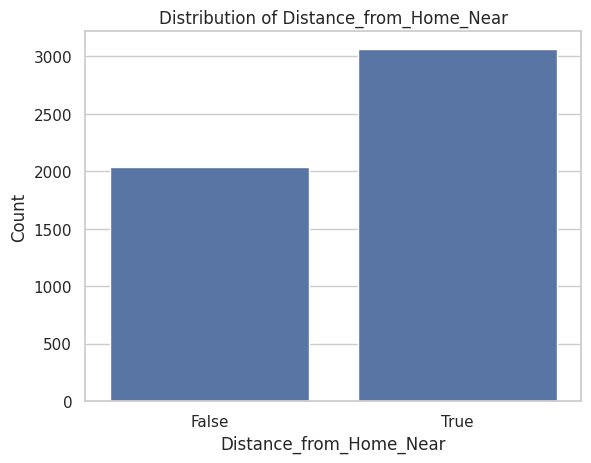

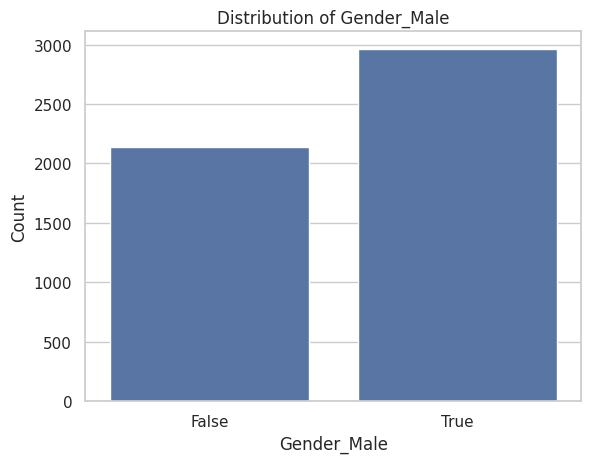

In [316]:
for column in X_train.columns:
    if X_train[column].nunique() > 2:
        sns.histplot(X_train[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()
    else:
        sns.countplot(x=X_train[column])
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.show()

-----------------------------------------------------------------
*****************************************************************
-----------------------------------------------------------------


**Target Variable Distribution**

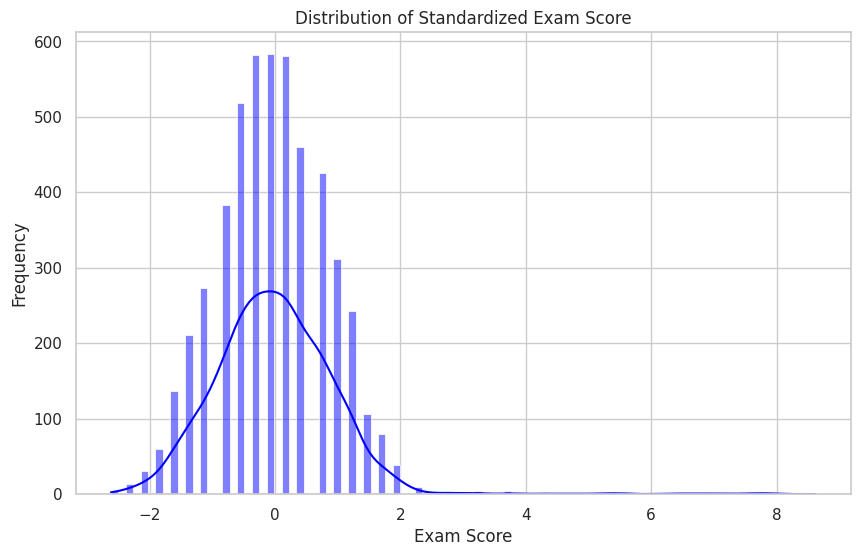

In [317]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(y_train, kde=True, color='blue')
plt.title('Distribution of Standardized Exam Score')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()

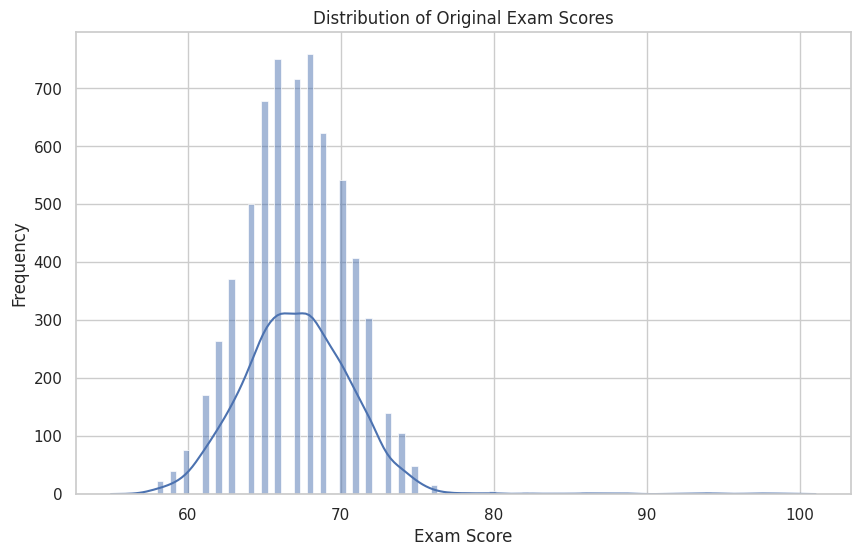

In [318]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Exam_Score'], kde=True)
plt.title('Distribution of Original Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()


-----------------------------------------------------------------
*****************************************************************
-----------------------------------------------------------------


**Correlation Matirx**

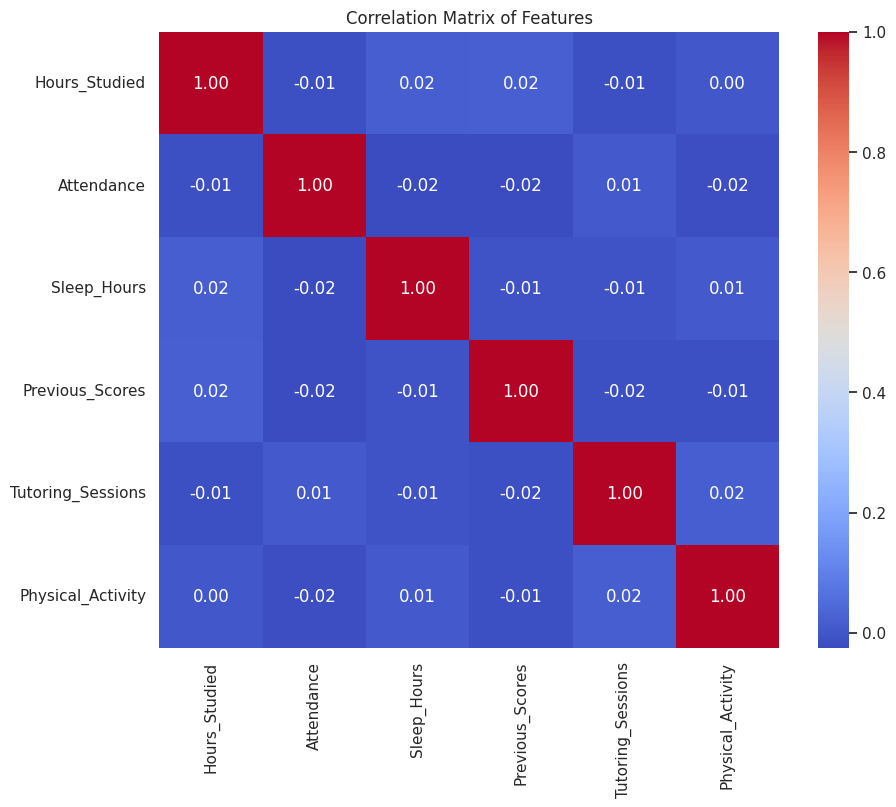

In [319]:
corr = X_train.select_dtypes(include=['float64', 'int64']).corr()

# Use a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

-----------------------------------------------------------------
*****************************************************************
-----------------------------------------------------------------


**Correlation of Features with the Target Variable**

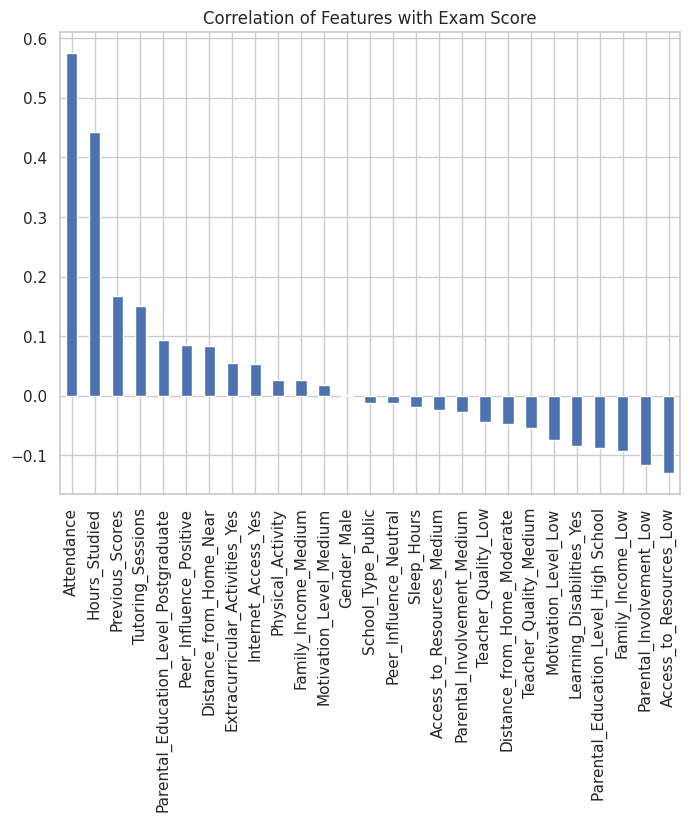

In [320]:
train_data = X_train.copy()
train_data['Exam_Score'] = y_train
target_corr = train_data.corr()['Exam_Score'].sort_values(ascending=False)
plt.figure(figsize=(8, 6))
target_corr.drop('Exam_Score').plot(kind='bar')
plt.title('Correlation of Features with Exam Score')
plt.show()


-----------------------------------------------------------------
*****************************************************************
-----------------------------------------------------------------


# Building Ahmed Model


Building the 3 models that the refer person Ahmed on Kaggle made. These models were:
1. Linear Regression model on the scaled training data
2. Ridge Regression model on the scaled training data (with regularization alpha=1.0)
3. Support Vector Regression (SVR) Model

The code has been exactly copied and applied to our data, and here it is:

Training data: (5421, 27), Training target: (5421,)
Testing data: (957, 27), Testing target: (957,)
Linear Regression
mean_squared_error:  0.28645507833582345
train_score:  0.7189662733604236
test_score:  0.7343179465189957

Ridge Regression
mean_squared_error (Ridge):  0.2864714586366209
train_score (Ridge):  0.7189657415642947
validation_score (Ridge):  0.7343027540777314

SVR
mean_squared_error:  0.2910779907403949
train_score:  0.729660197919176
test_score:  0.730030276466697

Linear Regression: 0.734318
Ridge: 0.734303
SVR: 0.730030


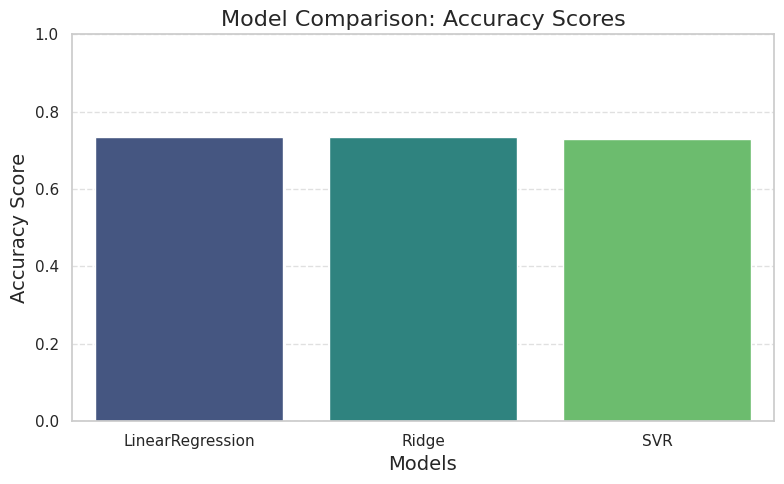

In [321]:
X = data.drop('Exam_Score', axis=1)
y = data['Exam_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
print(f"Training data: {X_train.shape}, Training target: {y_train.shape}")
print(f"Testing data: {X_test.shape}, Testing target: {y_test.shape}")


# Training a Linear Regression model on the scaled training data
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print("Linear Regression")
print("mean_squared_error: ",mean_squared_error(y_test, y_pred))
print("train_score: ",lr.score(X_train,y_train))
print("test_score: ",lr.score(X_test,y_test))
print("")


# Training a Ridge Regression model on the scaled training data (with regularization alpha=1.0)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
# Making predictions on the test set using the trained Ridge Regression model
y_pred_ridge = ridge.predict(X_test)
# Calculating and printing the mean squared error (MSE) and R² scores for the Ridge model
print("Ridge Regression")
print("mean_squared_error (Ridge): ", mean_squared_error(y_test, y_pred_ridge))
print("train_score (Ridge): ", ridge.score(X_train, y_train))
print("validation_score (Ridge): ", ridge.score(X_test, y_test))
print("")

# Support Vector Regression (SVR) Model
svr=SVR()
svr.fit(X_train,y_train)
y_pred=svr.predict(X_test)
# Printing evaluation metrics for SVR
print("SVR")
print("mean_squared_error: ",mean_squared_error(y_test, y_pred))
print("train_score: ",svr.score(X_train,y_train))
print("test_score: ",svr.score(X_test,y_test))
print("")

# Defining a dictionary of models
models = {
    'Linear Regression': lr,
    'Ridge': ridge,
    'SVR': svr
}

# List to store accuracy scores
acc = []
# Calculating the test score for each model
for name, model in models.items():
    score = model.score(X_test, y_test)
    acc.append((name, score))

# Printing the accuracy scores of each model
for model_name, score in acc:
    print(f"{model_name}: {score:.6f}")

# Extracting the model names and accuracy scores
acc=[]
names=['LinearRegression','Ridge','SVR']
acc.extend([lr.score(X_test,y_test),ridge.score(X_test,y_test),svr.score(X_test,y_test)])
acc
# Plotting the accuracy scores of the models
plt.figure(figsize=(8, 5))
sns.barplot(x=names, y=acc, palette='viridis')
plt.title('Model Comparison: Accuracy Scores', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy Score', fontsize=14)
# Setting y-axis limit and grid
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

**Taking Ahmed's SVR Model and Imporvising it**

In [299]:
'''
Ahmed's model
'''
svr=SVR()
svr.fit(X_train,y_train)
y_pred=svr.predict(X_test)
# Printing evaluation metrics for SVR
print("SVR")
print("mean_squared_error: ",mean_squared_error(y_test, y_pred))
print("train_score: ",svr.score(X_train,y_train))
print("test_score: ",svr.score(X_test,y_test))
print("")

SVR
mean_squared_error:  0.2910779907403949
train_score:  0.729660197919176
test_score:  0.730030276466697



In [306]:
'''
Our Model
'''
svr=SVR(kernel='poly', C=1, epsilon=0.01, degree=1)
svr.fit(X_train,y_train)
y_pred=svr.predict(X_test)
print("SVR")
print("mean_squared_error: ",mean_squared_error(y_test, y_pred))
print("train_score: ",svr.score(X_train,y_train))
print("test_score: ",svr.score(X_test,y_test))
print("")

SVR
mean_squared_error:  0.2856415402659261
train_score:  0.71587539696349
test_score:  0.735072488788768



# Our Model

**First testing the Linear Regression model and then fitting the Lasso Regression individually, and improvising them**

In [322]:
#Splitting data again to avoid confusion with Ahmed's models
X = data.drop('Exam_Score', axis=1)
y = data['Exam_Score']
#We will split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training data: {X_train.shape}, Training target: {y_train.shape}")
print(f"Testing data: {X_test.shape}, Testing target: {y_test.shape}")

Training data: (5102, 27), Training target: (5102,)
Testing data: (1276, 27), Testing target: (1276,)


In [325]:
# 1. Fit Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
pred_lr = linear_reg.predict(X_test)

# 2. Fit Lasso Regression
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
pred_lasso = lasso_reg.predict(X_test)
combined_pred = (pred_lr + pred_lasso) / 2
r2_lr = r2_score(y_test, pred_lr)
r2_lasso = r2_score(y_test, pred_lasso)
r2_combined = r2_score(y_test, combined_pred)

print("R2 Score Linear Regression:", r2_lr)
print("R2 Score Lasso Regression:", r2_lasso)
print("R2 Score Combined Model:", r2_combined)

R2 Score Linear Regression: 0.7314386522127074
R2 Score Lasso Regression: -3.6470095978513584e-05
R2 Score Combined Model: 0.5506387440112579


In [352]:
#Improving
from sklearn.linear_model import LassoCV
# Fit Lasso with Cross-Validation to find the best alpha
lasso_cv = LassoCV(cv=5, random_state=42)
lasso_cv.fit(X_train, y_train)
pred_lasso = lasso_cv.predict(X_test)
print(f"Chosen alpha: {lasso_cv.alpha_}")
print(f"Coefficients: {lasso_cv.coef_}")
r2_lasso_cv = r2_score(y_test, pred_lasso)
print(f"R2 Score Lasso CV Regression: {r2_lasso_cv}")



Chosen alpha: 0.0005749557881647498
Coefficients: [ 4.51650181e-01  5.85737636e-01 -4.25868059e-03  1.77817955e-01
  1.51746462e-01  5.16078553e-02 -5.06934628e-01 -2.59738689e-01
 -5.16627531e-01 -2.52826618e-01  1.42249342e-01 -2.74639265e-01
 -1.45546528e-01  2.21457103e-01 -2.86205845e-01 -1.51169478e-01
 -2.58726152e-01 -1.50300664e-01  9.48444008e-03  1.36102921e-01
  2.52477302e-01 -2.16244568e-01 -1.20038434e-01  1.30437621e-01
  6.43274555e-02  2.02384391e-01 -2.62723946e-04]
R2 Score Lasso CV Regression: 0.7315329456079375


R2 Score Combined Weighted Model: 0.7314710695336097


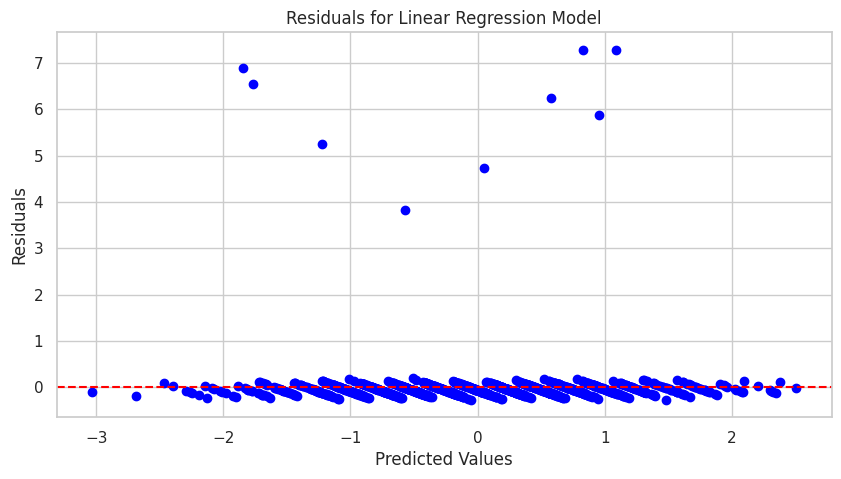

In [350]:
weight_lr = 0.8
weight_lasso = 0.2

combined_pred_weighted = (pred_lr * weight_lr) + (pred_lasso * weight_lasso)
r2_combined_weighted = r2_score(y_test, combined_pred_weighted)
print(f"R2 Score Combined Weighted Model: {r2_combined_weighted}")
plt.figure(figsize=(10, 5))
plt.scatter(pred_lr, y_test - pred_lr, c='blue', marker='o', label='Linear Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals for Linear Regression Model')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

**K-means cluster on features - Hours_Studied, Attendance, Tutoring_Sessions for grouping students based on their study habits.**

In [344]:
features = data[['Hours_Studied', 'Attendance', 'Tutoring_Sessions']]
features.dropna(inplace=True)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


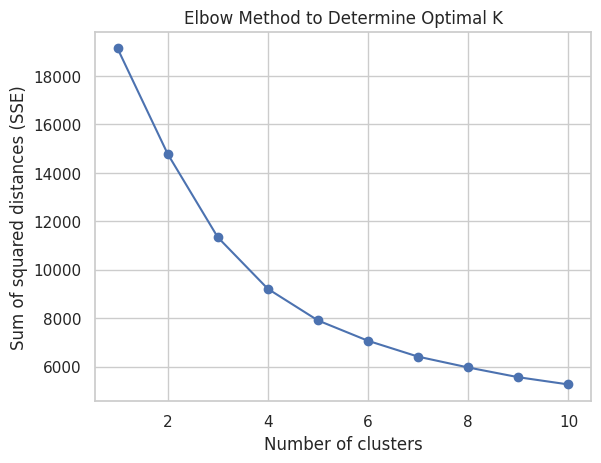

Cluster Centers:
[[-0.01217586  0.02149662  0.93067607]
 [ 0.00958308 -0.01691902 -0.73249344]]


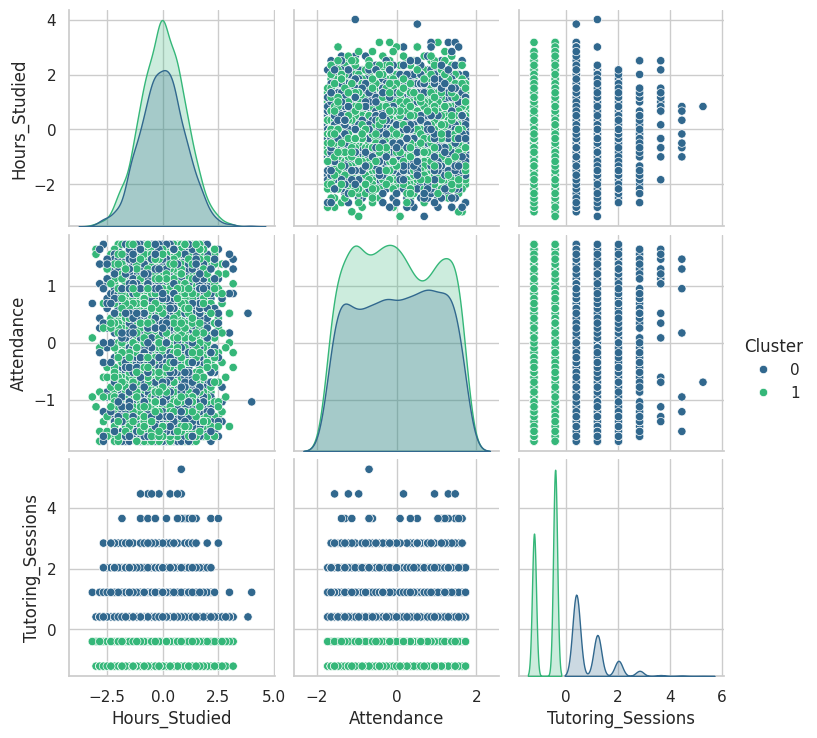

In [345]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method to Determine Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances (SSE)')
plt.show()
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(features_scaled)
data['Cluster'] = clusters
print("Cluster Centers:")
print(kmeans.cluster_centers_)
sns.pairplot(data, vars=['Hours_Studied', 'Attendance', 'Tutoring_Sessions'], hue='Cluster', palette='viridis')
plt.show()